# test goes-orthorectify functions

Orthorectify and clip a GOES ABI image

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import os
from osgeo import gdal

In [4]:
import goes_ortho

In [5]:
def getListOfFiles(dirName):
    # create a list of file and sub directories 
    # names in the given directory 
    # https://thispointer.com/python-how-to-get-list-of-files-in-directory-and-sub-directories/
    listOfFile = os.listdir(dirName)
    allFiles = list()
    # Iterate over all the entries
    for entry in listOfFile:
        # Create full path
        fullPath = os.path.join(dirName, entry)
        # If entry is a directory then get the list of files in this directory 
        if os.path.isdir(fullPath):
            allFiles = allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)
                
    return allFiles 

#### Pick an ABI image and a DEM

In [6]:
dirName =  r'\\j-lundquist-3.ce.washington.edu\storage\GOES\goes16\2017\03\20\ABI-L1b-RadC\18\C14'

images = getListOfFiles(dirName)

dem_filename = 'dem\dem2.tif' # local file

### Orthorectify and output new NetCDF file:

\\j-lundquist-3.ce.washington.edu\storage\GOES\goes16\2017\03\20\ABI-L1b-RadC\18\C14\OR_ABI-L1b-RadC-M3C14_G16_s20170791802510_e20170791805283_c20170791805329.nc

RUNNING: make_ortho_map()

Opening GOES ABI image...

Get inputs: projection information from the ABI radiance product
...done

Opening DEM file...

Create 2D arrays of longitude and latitude from the DEM
...done

For each grid cell in the DEM, compute the corresponding ABI scan angle (x and y, radians)
...done

Create metadata dictionary about this map
...done

Create pixel map dataset
<xarray.Dataset>
Dimensions:         (latitude: 3600, longitude: 5400)
Coordinates:
  * longitude       (longitude) float64 -120.0 -120.0 -120.0 ... -118.5 -118.5
  * latitude        (latitude) float64 38.5 38.5 38.5 38.5 ... 37.5 37.5 37.5
    dem_px_angle_x  (latitude, longitude) float64 -0.06658 -0.06657 ... -0.06468
    dem_px_angle_y  (latitude, longitude) float64 0.104 0.104 ... 0.102 0.102
Data variables:
    elevation       (latitude, 

KeyboardInterrupt: 

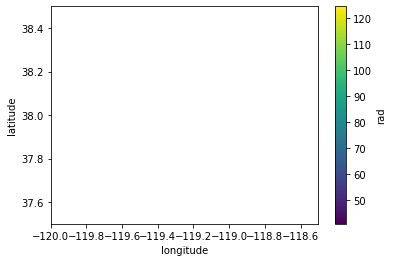

In [33]:
for image_path in images:
    print(image_path)
    # 1. generate the pixel mapping
    pixel_map = goes_ortho.make_ortho_map(image_path, dem_filename)
    # 2. apply to orthorectify an image
    ds = goes_ortho.orthorectify_abi_rad(image_path, pixel_map)

Try saving these as geotiffs too

In [29]:
#input_folder = r'C:\Users\steve\git\goes-view\test_ortho'
#output_folder = r'C:\Users\steve\git\goes-view\test_ortho'
#options = gdal.TranslateOptions(
#    outputType=gdal.GDT_Byte, 
#    #scaleParams=[''], 
#    #creationOptions=['COMPRESS=JPEG', 'PHOTOMETRIC=YCBCR', 'TILED=YES']
#)
#
#for entry in os.listdir(input_folder):
#    if entry.endswith('.nc'):
#        gdal.Translate(
#            os.path.join(output_folder, entry),
#            os.path.join(input_folder, entry),
#            options='-of GTiff'
#        )

In [30]:
#gdal.Translate(options)

In [31]:
#!gdalbuildvrt -input_file_list "C:\Users\steve\git\goes-view\test_ortho\mylist.txt" my.vrt
#
#
#!gdal_translate -a_srs EPSG:4326 -of PNG NETCDF:"myvrt.vrt":tb "C:\Users\steve\git\goes-view\test_ortho\test.png"

ERROR 4: `NETCDF:myvrt.vrt:tb' does not exist in the file system, and is not recognized as a supported dataset name.


#### open the output file and check it out

In [7]:
example_ds = xr.open_dataset('test_ortho.nc')

In [8]:
print(example_ds)

<xarray.Dataset>
Dimensions:         (latitude: 3600, longitude: 5400)
Coordinates:
  * longitude       (longitude) float64 -120.0 -120.0 -120.0 ... -118.5 -118.5
  * latitude        (latitude) float64 38.5 38.5 38.5 38.5 ... 37.5 37.5 37.5
    dem_px_angle_x  (latitude, longitude) float64 ...
    dem_px_angle_y  (latitude, longitude) float64 ...
Data variables:
    elevation       (latitude, longitude) float64 ...
    rad             (latitude, longitude) float32 ...
    tb              (latitude, longitude) float32 ...
Attributes:
    longitude_of_projection_origin:       -89.5
    semi_major_axis:                      6378137.0
    semi_minor_axis:                      6356752.31414
    satellite_height:                     42164160.0
    grs80_eccentricity:                   0.0818191910435
    longitude_of_projection_origin_info:  longitude of geostationary satellit...
    semi_major_axis_info:                 semi-major axis of GRS 80 reference...
    semi_minor_axis_info:       

In [9]:
example_ds.tb.latitude

<xarray.DataArray 'latitude' (latitude: 3600)>
array([38.499861, 38.499583, 38.499306, ..., 37.500694, 37.500417, 37.500139])
Coordinates:
  * latitude  (latitude) float64 38.5 38.5 38.5 38.5 ... 37.5 37.5 37.5 37.5

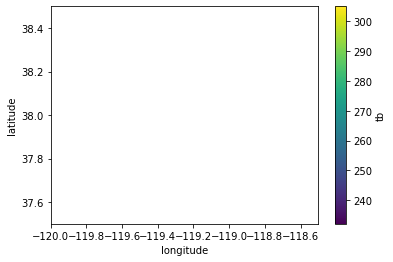

In [10]:
example_ds.tb.plot()